In [19]:
!pip install --upgrade tensorflow
!pip install --upgrade keras
! pip install ipythonblocks
!pip install --upgrade tensorflow
!pip install graphviz
!pip install --upgrade scikit-image
!pip install --upgrade tensorflow-intel

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.



  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ca/48/643d21747d52fa380f572f76c493779fc5b4bd03605247209d2dd0a6d9a9/keras-3.0.2-py3-none-any.whl.metadata
  Using cached keras-3.0.2-py3-none-any.whl.metadata (4.8 kB)
Using cached keras-3.0.2-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


  Obtaining dependency information for keras<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2


Accuracy of the KNN classifier with K=3: 0.92
Accuracy of the SVM classifier: 0.96
Accuracy of the Decision Tree classifier: 0.4


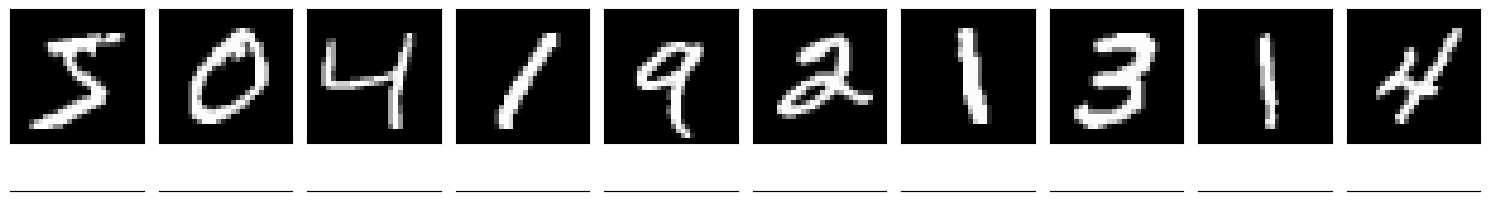

In [32]:
import numpy as np
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure
from graphviz import Source
# Load a smaller subset of the MNIST dataset for testing
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:1000]
train_labels = train_labels[:1000]
test_images = test_images[:100]
test_labels = test_labels[:100]

# Function to calculate HOG features
def get_hog_descriptors(images):
    descriptors = []
    for image in images:
        fd, _ = hog(image, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=True)
        descriptors.append(fd)
    return descriptors


# Calculate HOG descriptors for the training and testing images
X_train_hog = get_hog_descriptors(train_images)
X_test_hog = get_hog_descriptors(test_images)

# KNN Classifier
K = 3  # Example value for K
knn_classifier = KNeighborsClassifier(n_neighbors=K, metric='euclidean', n_jobs=-1)
knn_classifier.fit(X_train_hog, train_labels)
test_predictions_knn = knn_classifier.predict(X_test_hog)
accuracy_knn = metrics.accuracy_score(test_labels, test_predictions_knn)
print(f"Accuracy of the KNN classifier with K={K}: {accuracy_knn}")

# SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_hog, train_labels)
test_predictions_svm = svm_classifier.predict(X_test_hog)
accuracy_svm = metrics.accuracy_score(test_labels, test_predictions_svm)
print(f"Accuracy of the SVM classifier: {accuracy_svm}")

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_classifier.fit(X_train_hog, train_labels)
dt_prediction = dt_classifier.predict(X_test_hog)
accuracy_dt = metrics.accuracy_score(test_labels, dt_prediction)
print(f"Accuracy of the Decision Tree classifier: {accuracy_dt}")
# Plot the decision tree graph
export_graphviz(
    dt_classifier,
    out_file="mnist_tree.dot",
    feature_names=[f'feature_{i}' for i in range(len(X_train_hog[0]))],
    class_names=[str(i) for i in range(10)],  # assuming 10 classes in MNIST
    filled=True
)

# Visualize the decision tree graph
with open('mnist_tree.dot') as f:
    dot_graph = f.read()

Source(dot_graph)

# Visualize the original and HOG images for the first 10 training images
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 3),
                         subplot_kw={'xticks': [], 'yticks': []})

# Display original images
for ax, image in zip(axes[0], train_images[:10]):
    ax.imshow(image, cmap=plt.cm.gray)

# Display HOG images for KNN
X_train_hog_images_knn = get_hog_descriptors(train_images[:10])
for ax, hog_image in zip(axes[1, :5], X_train_hog_images_knn):
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    ax.imshow(np.atleast_2d(hog_image_rescaled), cmap=plt.cm.gray)

# Display HOG images for SVM
X_train_hog_images_svm = get_hog_descriptors(train_images[:10])
for ax, hog_image in zip(axes[1, 5:], X_train_hog_images_svm):
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    ax.imshow(np.atleast_2d(hog_image_rescaled), cmap=plt.cm.gray)

plt.tight_layout()
plt.show()